# Explore overfitting and underfitting
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.0-alpha0


## Download the IMDB dataset

In [3]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

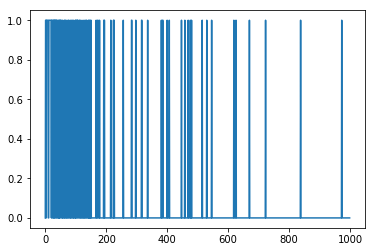

In [4]:
plt.plot(train_data[0])

## Demonstrate Overfitting

###  Create a  Baseline Model

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6213 - accuracy: 0.6771 - binary_crossentropy: 0.6213 - val_loss: 0.4917 - val_accuracy: 0.8058 - val_binary_crossentropy: 0.4917
Epoch 2/20
25000/25000 - 3s - loss: 0.4055 - accuracy: 0.8381 - binary_crossentropy: 0.4055 - val_loss: 0.3635 - val_accuracy: 0.8472 - val_binary_crossentropy: 0.3635
Epoch 3/20
25000/25000 - 3s - loss: 0.3317 - accuracy: 0.8620 - binary_crossentropy: 0.3317 - val_loss: 0.3340 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3340
Epoch 4/20
25000/25000 - 3s - loss: 0.3118 - accuracy: 0.8720 - binary_crossentropy: 0.3118 - val_loss: 0.3305 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3305
Epoch 5/20
25000/25000 - 3s - loss: 0.3006 - accuracy: 0.8751 - binary_crossentropy: 0.3006 - val_loss: 0.3290 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3290
Epoch 6/20
25000/25000 - 3s - loss: 0.2957 - accuracy: 0.8782 - binary_crossentropy: 0.2957 - val_loss: 0.3290

### Create a Smaller Model

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


##### train the model using same data

In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6670 - accuracy: 0.5935 - binary_crossentropy: 0.6670 - val_loss: 0.6176 - val_accuracy: 0.7443 - val_binary_crossentropy: 0.6176
Epoch 2/20
25000/25000 - 3s - loss: 0.5737 - accuracy: 0.7692 - binary_crossentropy: 0.5737 - val_loss: 0.5469 - val_accuracy: 0.8024 - val_binary_crossentropy: 0.5469
Epoch 3/20
25000/25000 - 3s - loss: 0.5230 - accuracy: 0.8182 - binary_crossentropy: 0.5230 - val_loss: 0.5149 - val_accuracy: 0.8362 - val_binary_crossentropy: 0.5149
Epoch 4/20
25000/25000 - 3s - loss: 0.4942 - accuracy: 0.8433 - binary_crossentropy: 0.4942 - val_loss: 0.4932 - val_accuracy: 0.8424 - val_binary_crossentropy: 0.4932
Epoch 5/20
25000/25000 - 3s - loss: 0.4740 - accuracy: 0.8540 - binary_crossentropy: 0.4740 - val_loss: 0.4786 - val_accuracy: 0.8474 - val_binary_crossentropy: 0.4786
Epoch 6/20
25000/25000 - 3s - loss: 0.4579 - accuracy: 0.8624 - binary_crossentropy: 0.4579 - val_loss: 0.4675

### Creating a Bigger Model 
See how quickly it begains to Overfit

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


#####  train the bigger_model with same data

In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.4251 - accuracy: 0.7993 - binary_crossentropy: 0.4251 - val_loss: 0.3642 - val_accuracy: 0.8402 - val_binary_crossentropy: 0.3642
Epoch 2/20
25000/25000 - 8s - loss: 0.2922 - accuracy: 0.8783 - binary_crossentropy: 0.2922 - val_loss: 0.3224 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3224
Epoch 3/20
25000/25000 - 6s - loss: 0.2274 - accuracy: 0.9104 - binary_crossentropy: 0.2274 - val_loss: 0.3378 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3378
Epoch 4/20
25000/25000 - 4s - loss: 0.1179 - accuracy: 0.9624 - binary_crossentropy: 0.1179 - val_loss: 0.3993 - val_accuracy: 0.8486 - val_binary_crossentropy: 0.3993
Epoch 5/20
25000/25000 - 4s - loss: 0.0285 - accuracy: 0.9951 - binary_crossentropy: 0.0285 - val_loss: 0.5235 - val_accuracy: 0.8438 - val_binary_crossentropy: 0.5235
Epoch 6/20
25000/25000 - 4s - loss: 0.0058 - accuracy: 0.9998 - binary_crossentropy: 0.0058 - val_loss: 0.606

### Plot the Training and Validaiton loss

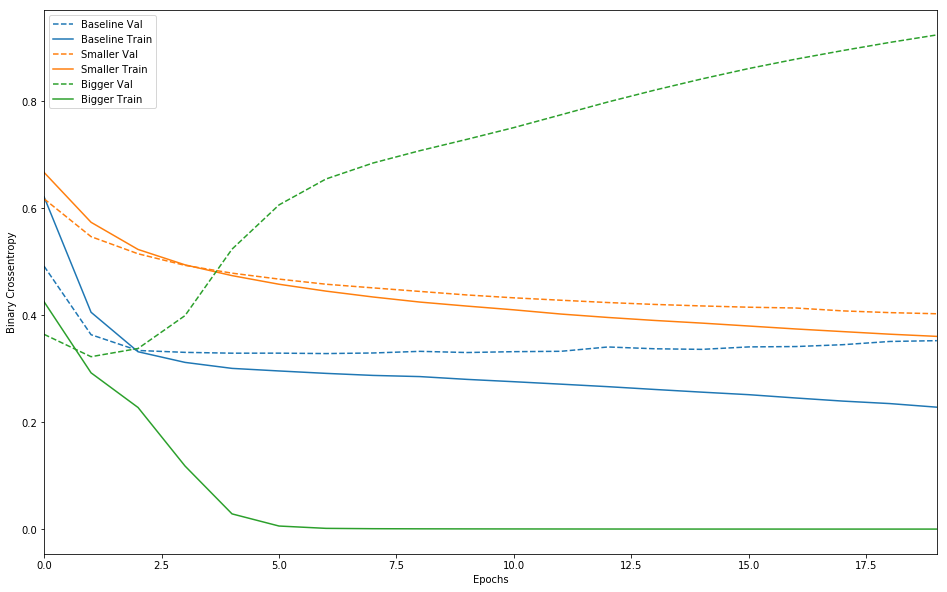

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

##  Stratergies

### Add Weight Regularization

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5835 - accuracy: 0.7244 - binary_crossentropy: 0.5393 - val_loss: 0.4377 - val_accuracy: 0.8306 - val_binary_crossentropy: 0.3947
Epoch 2/20
25000/25000 - 3s - loss: 0.3909 - accuracy: 0.8547 - binary_crossentropy: 0.3485 - val_loss: 0.3799 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3383
Epoch 3/20
25000/25000 - 4s - loss: 0.3559 - accuracy: 0.8705 - binary_crossentropy: 0.3152 - val_loss: 0.3715 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3317
Epoch 4/20
25000/25000 - 4s - loss: 0.3475 - accuracy: 0.8734 - binary_crossentropy: 0.3085 - val_loss: 0.3695 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3313
Epoch 5/20
25000/25000 - 3s - loss: 0.3414 - accuracy: 0.8745 - binary_crossentropy: 0.3036 - val_loss: 0.3656 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3286
Epoch 6/20
25000/25000 - 3s - loss: 0.3356 - accuracy: 0.8762 - binary_crossentropy: 0.2992 - val_loss: 0.3650

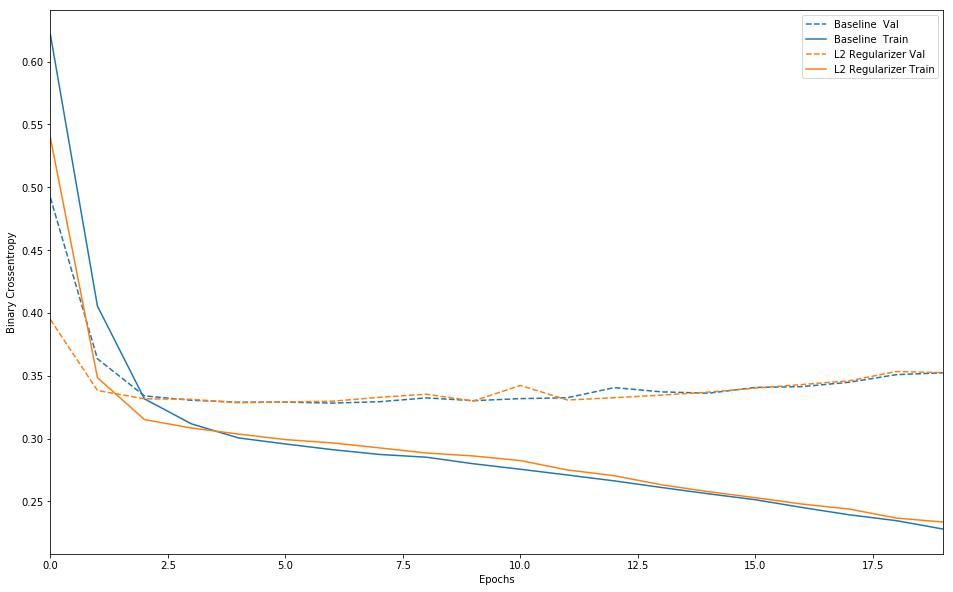

In [26]:
plot_history([('Baseline ', baseline_history),
             ('l2 Regularizer', l2_model_history)])

###  Add Dropout Layer

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6822 - accuracy: 0.5632 - binary_crossentropy: 0.6822 - val_loss: 0.6359 - val_accuracy: 0.7260 - val_binary_crossentropy: 0.6359
Epoch 2/20
25000/25000 - 3s - loss: 0.5930 - accuracy: 0.6884 - binary_crossentropy: 0.5930 - val_loss: 0.4782 - val_accuracy: 0.8226 - val_binary_crossentropy: 0.4782
Epoch 3/20
25000/25000 - 3s - loss: 0.4925 - accuracy: 0.7803 - binary_crossentropy: 0.4925 - val_loss: 0.3800 - val_accuracy: 0.8483 - val_binary_crossentropy: 0.3800
Epoch 4/20
25000/25000 - 4s - loss: 0.4291 - accuracy: 0.8210 - binary_crossentropy: 0.4291 - val_loss: 0.3479 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.3479
Epoch 5/20
25000/25000 - 3s - loss: 0.4033 - accuracy: 0.8386 - binary_crossentropy: 0.4033 - val_loss: 0.3321 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3321
Epoch 6/20
25000/25000 - 3s - loss: 0.3754 - accuracy: 0.8525 - binary_crossentropy: 0.3754 - val_loss: 0.3278

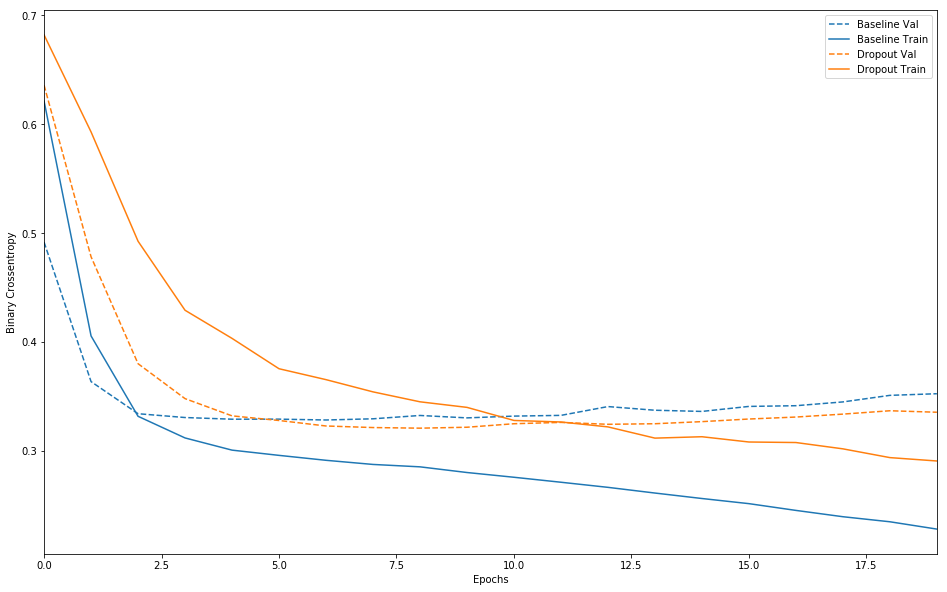

In [23]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Adding dropout is a clear improvement over the baseline model.

To recap: here the most common ways to prevent overfitting in neural networks:
- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.

And two important approaches not covered in this guide are **data-augmentation** and **batch normalization**.
